In [19]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_core.documents import Document
import torch
from torchvision import datasets, transforms
import tensorflow as tf
from tensorflow import keras
from torch.utils.data import Subset
from ultralytics import YOLO
import os
import sys
sys.path.append('..')
import utilities.utilities_images as utilities_images
import utilities.getter as getter
import scripts.extract_objects as extract_objects

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
PATH_FOLDER_IMG  = "./static/images/"
PATH_DB          = "./static/vector_store/"
UPDATE_DB        = True

if not extract_objects.vector_store_exist():
    print("not created")
    db, vectorizer, data_loader = extract_objects.init_search_engine_images(PATH_FOLDER_IMG, PATH_DB)
     
elif UPDATE_DB:
    print("need update")
    db, vectorizer, data_loader = extract_objects.init_search_engine_images(PATH_FOLDER_IMG, PATH_DB)    
    
else:
    print("created")
    db, vectorizer, data_loader = extract_objects.init_search_engine_images(PATH_FOLDER_IMG, PATH_DB, PATH_DB)
    

need update
Vectorisation des images...


`embedding_function` is expected to be an Embeddings object, support for passing in a function will soon be removed.


...Vectorisation terminée
Vector Database: 52 docs
be carefull ./static/vector_store/ already exists and is being replaced
./static/vector_store/ stored in ./static/vector_store/


In [35]:
db, vectorizer, data_loader = extract_objects.init_search_engine_images(PATH_FOLDER_IMG, PATH_DB, PATH_DB)


0: 640x512 1 person, 1 bus, 1 truck, 1 dog, 114.5ms
Speed: 3.6ms preprocess, 114.5ms inference, 8.4ms postprocess per image at shape (1, 3, 640, 512)
4 objects found
4

0: 640x416 1 person, 52.7ms
Speed: 1.1ms preprocess, 52.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 416)
1 objects found
1

0: 640x512 1 person, 78.6ms
Speed: 2.8ms preprocess, 78.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 512)
1 objects found
1

0: 640x448 1 person, 1 car, 48.8ms
Speed: 1.0ms preprocess, 48.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 448)
2 objects found
2

0: 640x416 1 person, 46.1ms
Speed: 1.4ms preprocess, 46.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 416)
1 objects found
1

0: 640x448 2 persons, 48.0ms
Speed: 1.4ms preprocess, 48.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 448)
2 objects found
2

0: 640x640 1 person, 1 chair, 1 cell phone, 132.0ms
Speed: 1.6ms preprocess, 132.0ms inference, 0.4ms 

`embedding_function` is expected to be an Embeddings object, support for passing in a function will soon be removed.


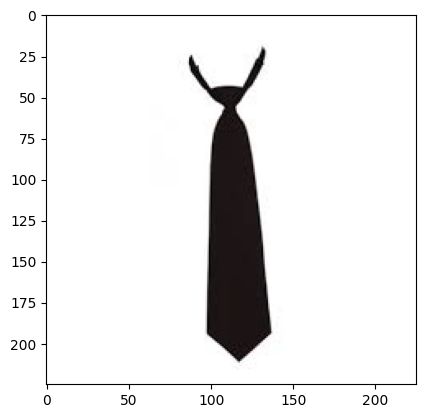

In [49]:
img = cv2.imread("./static/images/cravate0.jpeg")
plt.imshow(img) 


0: 640x640 1 tie, 115.6ms
Speed: 2.9ms preprocess, 115.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
1 objects found
1
1 objects detected
Vectorisation des images...
...Vectorisation terminée


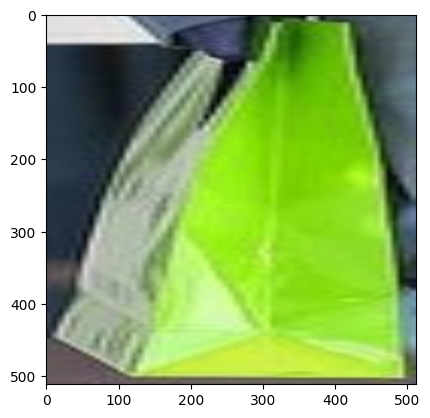

In [48]:
images_results = extract_objects.search_engine_image(query= ["./static/images/cravate0.jpeg"], 
                                                             db=db, vectorizer=vectorizer, data_loader=data_loader, nb_similar=1)

In [50]:
for obj in images_results:
    print(images_results[obj]["labels"])

['./static/images/Asap_Rocky3.jpeg']
